In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
Xtest = np.loadtxt('Xtest.csv')
Xtrain = np.loadtxt('Xtrain.csv')
Ytrain = np.loadtxt('Ytrain.csv')

In [55]:
### QUESTION 1 ###

## Gives the number of rows, equal to the number of images, in each of the test
## and training data files. Outputs the first to be reformatted as an image.
## Sums instances of positive and negative values in the training dataset.
## Gives reasoning for use of AUC_ROC as performance metric.
## Outputs AUC-ROC and AUC-PR of a random classifier with equivalent graphs.

[0.009  0.0091 0.0092 0.0093 0.0094 0.0095 0.0096 0.0097 0.0098 0.0099
 0.01   0.0101 0.0102 0.0103 0.0104 0.0105 0.0106 0.0107 0.0108 0.0109]


There are 5000 values in Xtest
There are 3000 values in Xtrain
There are 3000 values in Ytrain
There are 1179 positive and 1821 negative values in Ytrain


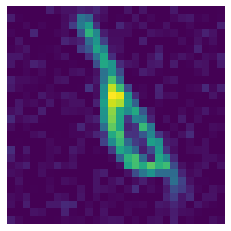

A random classifier has an accuracy of 0.5


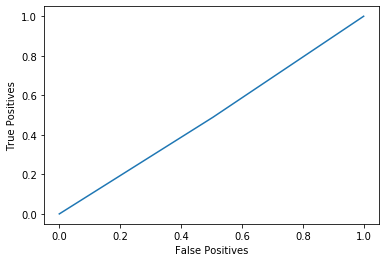

Dummy ROC AUC score is 0.492


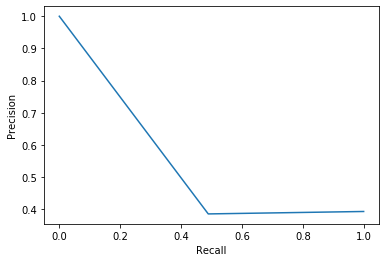

Dummy PR AUC score is 0.538


In [109]:
## 1.i/1.ii 
## Checking the contents of the loaded Test and Train files.
print('There are {} values in Xtest'.format(Xtest.shape[0]))
print('There are {} values in Xtrain'.format(Xtrain.shape[0]))
print('There are {} values in Ytrain'.format(Ytrain.shape[0]))
Ytrainpos = np.sum(Ytrain>=0)
Ytrainneg = np.sum(Ytrain<0)
print('There are {} positive and {} negative values in Ytrain'.format(Ytrainpos, Ytrainneg))

## Outputs image on given row, can change value to view different images
im1 = np.resize(Xtest[10],(28,28))
plt.axis("off")
plt.imshow(im1)
plt.show()

## 1.iii
## Due to the imbalance in size of the classes, accuracy is not the greatest performance metric
## The skew towards negative values similarly makes AUC_PR a poor performance metric
## Since we aren't trying to output probabilities, and we care equally about positive and negative techniques
## AUC_ROC is a good performance metric, and the on which will be used to tune parameters

## 1.iv
## Accuracy measures how many values were correctly labelled. A random classifier that evenly distributes labels across
## the two sets would clearly have an expected accuracy of 50%.

## Fits a random classifier over the dataset
from sklearn.dummy import DummyClassifier as DC
dm = DC(strategy = "uniform")
dm_fit = dm.fit(Xtrain, Ytrain)
dm_pred = dm.predict(Xtrain)
acc = dm_fit.score(Xtrain, Ytrain)
print('A random classifier has an accuracy of {}'.format(np.round(acc,2)))

## 1.v
## Calculates ROC-AUC of the random classifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
dm_fpr, dm_tpr, thresholds = roc_curve(Ytrain, dm_pred)
dm_roc_auc = roc_auc_score(Ytrain, dm_pred)
plt.plot(dm_fpr, dm_tpr)
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.show()
print('Dummy ROC AUC score is {}'.format(np.round(dm_roc_auc,3)))

## Calculates PR-AUC of the random classifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
dm_prec, dm_rec, thresholds = precision_recall_curve(Ytrain, dm_pred)
dm_pr_auc = auc(dm_rec, dm_prec)
plt.plot(dm_rec, dm_prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
print('Dummy PR AUC score is {}'.format(np.round(dm_pr_auc,3)))

## Cannot calculate ROC-AUC and PR-AUC of the test data as have no true values

In [5]:
### QUESTION 2 ###

## Cross-Validates KNearestNeighbour over a stratified split of 5 sets, using K = 1.
## Gives mean of each performance metric over each split, and then average
## Additionally tests over data that is Normalized, and that is scaled
## GridSearch for optimal K value for 2.iv is covered in question 3

In [111]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=1)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True)
skf_splits = skf.get_n_splits(Xtrain, Ytrain)

nn_fit, nn_pred, nn_accuracy, nn_roc_score, nn_pr_score = [],[],[],[],[]
i = 0

## Tests classifier over each split
for train_index, test_index in skf.split(Xtrain, Ytrain):
    X_train, X_test = Xtrain[train_index], Xtrain[test_index]
    y_train, y_test = Ytrain[train_index], Ytrain[test_index]
    nn_fit.append(nn.fit(X_train, y_train))
    nn_pred.append(nn.predict(X_test))
    nn_accuracy.append(nn_fit[i].score(X_test, y_test))    
    nn_roc_score.append(roc_auc_score(y_test, nn_pred[i]))
    nn_prec, nn_rec, thresholds = precision_recall_curve(y_test, nn_pred[i])
    nn_pr_score.append(auc(nn_rec, nn_prec))
    i += 1

print('Accuracy over 5 folds: {}; average: {}; StdDev: {}'
      .format(np.around(nn_accuracy, 2),np.around(np.mean(nn_accuracy),2), np.around(np.std(nn_accuracy),2)))
print('AUC_ROC score over 5 folds: {}; average: {}; StdDev: {}'
      .format(np.around(nn_roc_score, 2), np.around(np.mean(nn_roc_score),2), np.around(np.std(nn_roc_score),2)))
print('AUC_PR score over 5 folds : {}; average: {}; StdDev: {}'
      .format(np.around(nn_pr_score, 2), np.around(np.mean(nn_pr_score),2), np.around(np.std(nn_pr_score),2)))

Accuracy over 5 folds: [0.77 0.74 0.76 0.73 0.76]; average: 0.75; StdDev: 0.01
AUC_ROC score over 5 folds: [0.76 0.73 0.75 0.72 0.75]; average: 0.74; StdDev: 0.01
AUC_PR score over 5 folds : [0.76 0.74 0.75 0.73 0.75]; average: 0.75; StdDev: 0.01


In [5]:
## Tests KNearestNeighbour on scaled data set
## Since n = 1, our Classifier only relise on the closest data point.
## Scaling the data pushes points closer together, thus resulting in worse performance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(Xtrain)
nn_scaler_fit, nn_scaler_pred, nn_scaler_accuracy, nn_scaler_roc_score, nn_scaler_pr_score  = [],[],[],[],[]
i = 0

for train_index, test_index in skf.split(scaler, Ytrain):
    X_train, X_test = scaler[train_index], scaler[test_index]
    y_train, y_test = Ytrain[train_index], Ytrain[test_index]
    nn_scaler_fit.append(nn.fit(X_train, y_train))
    nn_scaler_pred.append(nn.predict(X_test))
    nn_scaler_accuracy.append(nn_fit[i].score(X_test, y_test))
    nn_scaler_roc_score.append(roc_auc_score(y_test, nn_pred[i]))
    nn_scaler_prec, nn_scaler_rec, thresholds = precision_recall_curve(y_test, nn_scaler_pred[i])
    nn_scaler_pr_score.append(auc(nn_scaler_rec, nn_scaler_prec))
    i += 1

print('Accuracy over 5 folds: {}; average: {}'
      .format(np.around(nn_scaler_accuracy, 2), np.around(np.mean(nn_scaler_accuracy),2)))
print('AUC_ROC score over 5 folds: {}; average: {}'
      .format(np.around(nn_scaler_roc_score, 2), np.around(np.mean(nn_scaler_roc_score),2)))
print('AUC_PR score over 5 folds : {}; average {}'
      .format(np.around(nn_scaler_pr_score, 2), np.around(np.mean(nn_scaler_pr_score),2)))

Accuracy over 5 folds: [0.77 0.74 0.73 0.75 0.77]; average: 0.75
AUC_ROC score over 5 folds: [0.5  0.51 0.49 0.55 0.49]; average: 0.51
AUC_PR score over 5 folds : [0.76 0.74 0.72 0.75 0.76]; average 0.75


In [6]:
## Tests KNearestNeighbour on Normalized data set
## Results are similar to having scaled the data due to the lack of discretion in the n = 1 case.

from sklearn.preprocessing import Normalizer
transform = Normalizer().fit_transform(Xtrain)

nn_transform_fit, nn_transform_pred, nn_transform_accuracy, nn_transform_roc_score, nn_transform_pr_score = [],[],[],[],[]
i = 0

for train_index, test_index in skf.split(transform, Ytrain):
    X_train, X_test = transform[train_index], transform[test_index]
    y_train, y_test = Ytrain[train_index], Ytrain[test_index]
    nn_transform_fit.append(nn.fit(X_train, y_train))
    nn_transform_pred.append(nn.predict(X_test))
    
    nn_transform_accuracy.append(nn_fit[i].score(X_test, y_test))
    nn_transform_roc_score.append(roc_auc_score(y_test, nn_pred[i]))
    nn_transform_prec, nn_transform_rec, thresholds = precision_recall_curve(y_test, nn_transform_pred[i])
    nn_transform_pr_score.append(auc(nn_transform_rec, nn_transform_prec))
    i += 1

print('Accuracy over 5 folds: {}; average: {}'.format(np.around(nn_transform_accuracy, 2), np.around(np.mean(nn_transform_accuracy),2)))
print('AUC_ROC score over 5 folds: {}; average: {}'.format(np.around(nn_transform_roc_score, 2), np.around(np.mean(nn_transform_roc_score),2)))
print('AUC_PR score over 5 folds : {}; average {}'.format(np.around(nn_transform_pr_score, 2), np.around(np.mean(nn_transform_pr_score),2)))

Accuracy over 5 folds: [0.77 0.74 0.79 0.74 0.78]; average: 0.77
AUC_ROC score over 5 folds: [0.51 0.53 0.54 0.51 0.49]; average: 0.52
AUC_PR score over 5 folds : [0.77 0.75 0.79 0.74 0.78]; average 0.77


In [9]:
### QUESTION 3 ###

## AUC ROC was used throughout as the performance metric, as decided in Question 1.
## Optimal value of KNearestNeighbour as also required in 2.iv is here
## Gridparams for final search are left as comment to reduce running time
## Current Gridparams are final optimised parameters
## Where best data that is Normalized/Scaled is used to improve performance
## Each block outputs best params and best AUC-ROC score
## Final matrix is best values

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
scalerX = StandardScaler().fit_transform(Xtrain)
normX = Normalizer().fit_transform(Xtrain)

In [69]:
## Computes optimal value of K for KNeighbours. Also the solution to 2iv.
## Tests on scaled data

from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
#gridparams = {'n_neighbors' : #list(range(1,30))}
gridparams = {'n_neighbors' : [25]}
knnclf = GridSearchCV(knn, gridparams, cv = 5, scoring = ['accuracy', 'roc_auc', 'average_precision'], refit = 'roc_auc')
knnclf.fit(scalerX, Ytrain)
knn_best_score = knnclf.best_score_
knn_best_value = knnclf.best_params_

print(knnclf.best_params_)
print(np.around(knnclf.best_score_,2))

## Passes on results of best scorer
knn_mean_acc = knnclf.cv_results_['mean_test_accuracy'][0]
knn_std_acc = knnclf.cv_results_['std_test_accuracy'][0]
knn_mean_roc = knnclf.cv_results_['mean_test_roc_auc'][0]
knn_std_roc = knnclf.cv_results_['std_test_roc_auc'][0]
knn_mean_pr = knnclf.cv_results_['mean_test_average_precision'][0]
knn_std_pr = knnclf.cv_results_['std_test_average_precision'][0]


{'n_neighbors': 25}
0.85


In [71]:
## Computes optimal parameters for Perceptron. Alters Max iterations to avoid overfitting
## Tests on scaled data

from sklearn.linear_model import Perceptron
per = Perceptron()
#gridparams = {'alpha': np.arange(0.0001, 0.01, 0.001), 'max_iter':np.arange(10,100,10)}
gridparams = {'alpha': [0.0001],
              'max_iter':[10]}
perclf = GridSearchCV(per, gridparams, cv = 5, scoring = ['accuracy', 'roc_auc', 'average_precision'], refit = 'roc_auc', n_jobs = -1)
perclf.fit(scalerX, Ytrain)
per_best_score = perclf.best_score_
per_best_value = perclf.best_params_
print(perclf.best_params_)
print(np.around(perclf.best_score_, 2))


per_mean_acc = perclf.cv_results_['mean_test_accuracy'][0]
per_std_acc = perclf.cv_results_['std_test_accuracy'][0]
per_mean_roc = perclf.cv_results_['mean_test_roc_auc'][0]
per_std_roc = perclf.cv_results_['std_test_roc_auc'][0]
per_mean_pr = perclf.cv_results_['mean_test_average_precision'][0]
per_std_pr = perclf.cv_results_['std_test_average_precision'][0]

{'alpha': 0.0001, 'max_iter': 10}
0.72


C:\Users\matty\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [70]:
## Naive Bayes takes no hyperparameters, so just cross validates

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnbskf = StratifiedKFold(n_splits = 5, shuffle = True)
gnbskf_splits = skf.get_n_splits(scalerX, Ytrain)
gnb_fit, gnb_pred, gnb_accuracy, gnb_roc_score, gnb_pr_score = [],[],[],[],[]
i = 0

for train_index, test_index in gnbskf.split(Xtrain, Ytrain):
    X_train, X_test = Xtrain[train_index], Xtrain[test_index]
    y_train, y_test = Ytrain[train_index], Ytrain[test_index]
    gnb_fit.append(gnb.fit(X_train, y_train))
    gnb_pred.append(gnb.predict(X_test))
    gnb_accuracy.append(gnb_fit[i].score(X_test, y_test))    
    gnb_roc_score.append(roc_auc_score(y_test, gnb_pred[i]))
    gnb_prec, gnb_rec, thresholds = precision_recall_curve(y_test, gnb_pred[i])
    gnb_pr_score.append(auc(gnb_prec, gnb_rec))
    i += 1

gnb_mean_acc = np.mean(gnb_accuracy)
gnb_std_acc = np.std(gnb_accuracy)
gnb_mean_roc = np.mean(gnb_roc_score)
gnb_std_roc = np.std(gnb_roc_score)
gnb_mean_pr = np.mean(gnb_pr_score)
gnb_std_pr = np.std(gnb_pr_score)
print(np.around(gnb_mean_roc,2))

0.65


In [72]:
## Computes optimal LR parameters, multiple searches over different solvers 
## were run, the given one is the final one. Tests on scaled data.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#gridparams = {'penalty':['l1', 'l2'], 'C':np.logspace(-3,3,7), 'solver':['liblinear']}
gridparams = {'penalty':['l1'], 
              'C':[0.1], 
              'solver':['liblinear']}
lrclf = GridSearchCV(lr, gridparams, cv = 5, scoring = ['accuracy', 'roc_auc', 'average_precision'], refit = 'roc_auc', n_jobs = -1)
lrclf.fit(scalerX, Ytrain)
lr_best_score = lrclf.best_score_
lr_best_value = lrclf.best_params_
print(lrclf.best_params_)
print(np.around(lr_best_score,2))

lr_mean_acc = lrclf.cv_results_['mean_test_accuracy'][0]
lr_std_acc = lrclf.cv_results_['std_test_accuracy'][0]
lr_mean_roc = lrclf.cv_results_['mean_test_roc_auc'][0]
lr_std_roc = lrclf.cv_results_['std_test_roc_auc'][0]
lr_mean_pr = lrclf.cv_results_['mean_test_average_precision'][0]
lr_std_pr = lrclf.cv_results_['std_test_average_precision'][0]

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.79


In [73]:
## Computes optimal value of C for Linear SVM. Tests on scaled data.

from sklearn.svm import LinearSVC
lin = LinearSVC()
#gridparams = {'C' : np.arange(0.001,1,0.01), 'penalty': ['l2']}
gridparams = {'C' : [0.001]}
linclf = GridSearchCV(lin, gridparams, cv = 5, scoring = ['accuracy', 'roc_auc', 'average_precision'], refit = 'roc_auc', n_jobs = -1, verbose = 1)
linclf.fit(scalerX, Ytrain)
lin_best_score = linclf.best_score_
lin_best_value = linclf.best_params_
print(lin_best_value)
print(np.around(lin_best_score, 2))

lin_mean_acc = linclf.cv_results_['mean_test_accuracy'][0]
lin_std_acc = linclf.cv_results_['std_test_accuracy'][0]
lin_mean_roc = linclf.cv_results_['mean_test_roc_auc'][0]
lin_std_roc = linclf.cv_results_['std_test_roc_auc'][0]
lin_mean_pr = linclf.cv_results_['mean_test_average_precision'][0]
lin_std_pr = linclf.cv_results_['std_test_average_precision'][0]


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


{'C': 0.001}
0.79


In [74]:
## Computes optimal SVC values. Runs over massive GridSearch as was used for final pipeline and leaderboard submission.
## Runs over normalized data.

from sklearn.svm import SVC
ker = SVC()
#gridparams = {'C':np.arange(0.009,0.1,0.003), 'gamma': ['scale'], 'kernel' : ['poly', 'rbf'], 'degree' : np.arange(5,10,1), 'class_weight': ['balanced'], 'probability' : [True]}
gridparams = {'C':[0.00979], 
              'gamma':['scale'], 
              'kernel' : ['poly'], 
              'degree' : [9], 
              'class_weight': ['balanced'], 
              'probability' : [True]}

kerclf = GridSearchCV(ker, gridparams, cv = 5, scoring = ['accuracy', 'roc_auc', 'average_precision'], refit = 'roc_auc', n_jobs = -1, verbose = 1)
kerclf.fit(normX, Ytrain)
ker_best_score = kerclf.best_score_
ker_best_value = kerclf.best_params_
print(kerclf.best_params_)
print(np.around(ker_best_score,2))

ker_mean_acc = kerclf.cv_results_['mean_test_accuracy'][0]
ker_std_acc = kerclf.cv_results_['std_test_accuracy'][0]
ker_mean_roc = kerclf.cv_results_['mean_test_roc_auc'][0]
ker_std_roc = kerclf.cv_results_['std_test_roc_auc'][0]
ker_mean_pr = kerclf.cv_results_['mean_test_average_precision'][0]
ker_std_pr = kerclf.cv_results_['std_test_average_precision'][0]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


{'C': 0.00979, 'class_weight': 'balanced', 'degree': 9, 'gamma': 'scale', 'kernel': 'poly', 'probability': True}
0.88


In [88]:
Titles = ["knn","per","bay","lreg","lin","ker"]
Mean_acc = np.around([knn_mean_acc, per_mean_acc, gnb_mean_acc, lr_mean_acc, lin_mean_acc, ker_mean_acc],3)
Std_acc = np.around([knn_std_acc, per_std_acc, gnb_std_acc, lr_std_acc, lin_std_acc, ker_std_acc],3)
Mean_roc = np.around([knn_mean_roc, per_mean_roc, gnb_mean_roc, lr_mean_roc, lin_mean_roc, ker_mean_roc],3)
Std_roc = np.around([knn_std_roc, per_std_roc, gnb_std_roc, lr_std_roc, lin_std_roc, ker_std_roc],3)
Mean_pr = np.around([knn_mean_pr, per_mean_pr, gnb_mean_pr, lr_mean_pr, lin_mean_pr, ker_mean_pr],3)
Std_pr = np.around([knn_std_pr, per_std_pr, gnb_std_pr, lr_std_pr, lin_std_pr, ker_std_pr],3)


## Prints results of latest run 
print(Titles)
print(Mean_acc)
print(Std_acc)
print(Mean_roc)
print(Std_roc)
print(Mean_pr)
print(Std_pr)

['knn', 'per', 'bay', 'lreg', 'lin', 'ker']
[0.767 0.666 0.664 0.714 0.71  0.803]
[0.008 0.026 0.019 0.016 0.012 0.012]
[0.849 0.719 0.65  0.791 0.787 0.876]
[0.012 0.036 0.019 0.005 0.009 0.005]
[0.751 0.59  0.266 0.636 0.633 0.793]
[0.017 0.035 0.018 0.003 0.004 0.01 ]


In [18]:
### QUESTION 4 ###

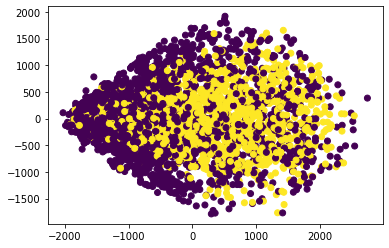

In [42]:
## Uses PCA to reduce number of data dimensions to 2
## Scatter plot shows that in 2 dimensions, though there is a seperation
## the two classes have a large overlap. This is expected when moving from
## 784 dimensions down to 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xtrain)
Ypca = np.asarray(Ytrain)
Fpca = np.c_[Xpca, Ypca]
plt.scatter(Fpca[:, 0], Fpca[:, 1], c=Fpca[:,2])
plt.show()

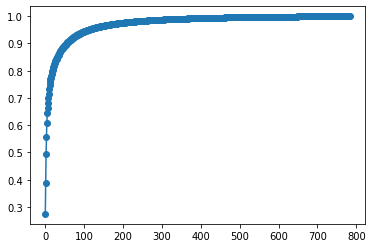

In [27]:
## Plots scree graph of variance at each dimension.
## 95% variance occurs at around n = 120

pca = PCA()
XpcaScree = pca.fit_transform(Xtrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'o-')
plt.show()

In [92]:
## Performs a (much smaller!) GridSearch over dimension reduced dataset 
## 

from sklearn.svm import SVC
ker = SVC()
#gridparams = {'C': np.logspace(-3,3,7), 'gamma': ['scale'], 'kernel' : ['poly', 'rbf'], 'degree' : np.arange(5,10,1)}
gridparams = {'C':[10.01], 'gamma':['scale'], 'kernel' : ['rbf']}
ker_pca_clf = GridSearchCV(ker, gridparams, cv = 5, scoring = ['accuracy', 'roc_auc', 'average_precision'], refit = 'roc_auc', n_jobs = -1, verbose = 1)
ker_pca_clf.fit(Xpca, Ytrain)
ker_pca_best_score = ker_pca_clf.best_score_
ker_pca_best_value = ker_pca_clf.best_params_

## Reduction of dimensions results in loss of information, and so worse scoring
print(ker_pca_clf.best_params_)
print(np.around(ker_pca_best_score,2))

##Stores all Mean and STD scores for later evaluation
ker_pca_mean_acc = ker_pca_clf.cv_results_['mean_test_accuracy'][0]
ker_pca_std_acc = ker_pca_clf.cv_results_['std_test_accuracy'][0]
ker_pca_mean_roc = ker_pca_clf.cv_results_['mean_test_roc_auc'][0]
ker_pca_std_roc = ker_pca_clf.cv_results_['std_test_roc_auc'][0]
ker_pca_mean_pr = ker_pca_clf.cv_results_['mean_test_average_precision'][0]
ker_pca_std_pr = ker_pca_clf.cv_results_['std_test_average_precision'][0]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


{'C': 10.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.75


In [94]:
## Intalls and fits XGBoost over PCA reduced dataset.
## Tested with altering tree depth, number of estimators and learning rate
## Combination of PCA and XGBoost results in quick classification

!pip install xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
#gridparams = {'max_depth': range (2, 10, 1), 'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.01, 0.05]}
gridparams = {'max_depth': [3], 'n_estimators':[180],'learning_rate': [0.05]}
xg_pca_clf = GridSearchCV(xg, gridparams, cv = 5, scoring = ['accuracy', 'roc_auc', 'average_precision'], refit = 'roc_auc', n_jobs = -1, verbose = 1)
xg_pca_clf.fit(Xpca, Ytrain)
xg_pca_best_score = xg_pca_clf.best_score_
xg_pca_best_value = xg_pca_clf.best_params_

print(xg_pca_clf.best_params_)
print(np.around(xg_pca_best_score,2))

## Stores all Mean and STD of scores for evaluation
xg_pca_mean_acc = xg_pca_clf.cv_results_['mean_test_accuracy'][0]
xg_pca_std_acc = xg_pca_clf.cv_results_['std_test_accuracy'][0]
xg_pca_mean_roc = xg_pca_clf.cv_results_['mean_test_roc_auc'][0]
xg_pca_std_roc = xg_pca_clf.cv_results_['std_test_roc_auc'][0]
xg_pca_mean_pr = xg_pca_clf.cv_results_['mean_test_average_precision'][0]
xg_pca_std_pr = xg_pca_clf.cv_results_['std_test_average_precision'][0]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 180}
0.76


In [22]:
### QUESTION 5 ###

## For preprocessing I tested combinations of Normalizing and Scaling data, and found just Normalizing to be optimal
## I used the results from the large gridsearch in Question 3 as parameters for the model.

In [98]:
## Tests final pipeline on original training set, gives ROC_AUC and probabilities
Xtest = np.loadtxt('Xtest.csv')
Xtrain = np.loadtxt('Xtrain.csv')
Ytrain = np.loadtxt('Ytrain.csv')
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
normX = Normalizer().fit_transform(Xtrain)
clf = SVC()
gridparams = {'C': [0.009799999999999994], 
              'gamma': ['scale'], 
              'kernel' : ['poly'], 
              'degree' : [9], 
              'class_weight': ['balanced'], 
              'probability' : [True]}
clf = GridSearchCV(ker, gridparams, cv = 5, scoring = ['accuracy', 'roc_auc', 'average_precision'], refit = 'roc_auc', n_jobs = -1, verbose = 1)
clf.fit(normX, Ytrain)
print(clf.best_score_)

probs = clf.predict_proba(normX)
print(roc_auc_score(Ytrain, probs[:,1]))
print(probs)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   59.4s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   59.7s finished


0.8757564318159975
0.9972230489729892
[[0.14285679 0.85714321]
 [0.4071031  0.5928969 ]
 [0.14273486 0.85726514]
 ...
 [0.82792187 0.17207813]
 [0.10424523 0.89575477]
 [0.90825687 0.09174313]]


In [99]:
## Runs final pipeline to get probabilities for classification of Test data to submit. 
## Currently gives a score of 0.9032 on the leaderboard.

Xtest = np.loadtxt('Xtest.csv')
Xtrain = np.loadtxt('Xtrain.csv')
Ytrain = np.loadtxt('Ytrain.csv')
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

clf = SVC(C = 0.00979, class_weight = 'balanced', degree = 9, gamma = 'scale', kernel = 'poly', probability = True)
normX = Normalizer().fit_transform(Xtrain)
#scalerX = StandardScaler().fit_transform(normX)
clf.fit(normX, Ytrain)

normXt = Normalizer().fit_transform(Xtest)
#scalerXt = StandardScaler().fit_transform(normXt)
probs = clf.predict_proba(normXt)
print(probs)
np.savetxt("probabilities.csv", probs[:,1])

SVC(C=0.00979, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
[[0.90536939 0.09463061]
 [0.94210067 0.05789933]
 [0.33582839 0.66417161]
 ...
 [0.32931253 0.67068747]
 [0.87672802 0.12327198]
 [0.68802427 0.31197573]]
